In [1]:
# Importação das Libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Realizando leitura do arquivo excel com as estatísticas gerais da partida
df_Teams = pd.read_excel('Brazilian_Teams_Statistics.xlsx')

In [3]:
# Realizando leitura do arquivo excel com as características individuais dos jogadores
df_Players = pd.read_excel('Brazilian_Players_Statistics.xlsx')

In [4]:
## Lógica apenas para teste com um time
## Filtrando as partidas que envolvem o Botafogo
#df_Teams = df_Teams[(df_Teams['Home'].str.contains('Botafogo')) | (df_Teams['Away'].str.contains('Botafogo'))]
#
## Criando um novo DataFrame para armazenar os dados do Botafogo e do adversário por rodada
#df_TeamsFiltered = pd.DataFrame(columns=df_Players.columns)
#
## Iterando sobre as linhas do DataFrame original
#for index, row in df_Teams.iterrows():
#    home_condition = (df_Players['Team'] == row['Home']) & (df_Players['Game'] == row['Game'])
#    away_condition = (df_Players['Team'] == row['Away']) & (df_Players['Game'] == row['Game'])
#    df_TeamsFiltered = df_TeamsFiltered.append(df_Players.loc[home_condition])
#    df_TeamsFiltered = df_TeamsFiltered.append(df_Players.loc[away_condition])
#    
#df_Players = df_TeamsFiltered

In [5]:
df_Teams.head(3)

,Game,Home,HomeGoal,HomePossession,HomePassingAccuracy,HomeShotsTarget,HomeSaves,Away,AwayGoal,AwayPossession,AwayPassingAccuracy,AwayShotsTarget,AwaySaves
0,1,América (MG),0,46,74,12,57.0,Fluminense,3,54,83,50,100.0
1,1,Palmeiras,2,52,82,29,75.0,Cuiabá,1,48,78,33,60.0
2,1,Bragantino,2,55,75,54,66.0,Bahia,1,45,69,33,71.0


In [6]:
df_Players.head(3)

,Game,Team,Holder,Player,Number,Nation,Pos,Age,Min,Gls,...,Launch%,AvgLen,Att.10,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist
0,1,América (MG),Y,Henrique Almeida,19,br BRA,FW,31-323,62,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,1,América (MG),N,Wellington Paulista,9,br BRA,FW,38-358,28,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,1,América (MG),Y,Felipe Azevedo,11,br BRA,LW,36-095,68,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [7]:
# Substituindo valores nulos por 0
df_Players.fillna(0, inplace=True)
# Substituindo valores vazios por 0
df_Players.replace('', 0, inplace=True)

In [8]:
# Substituindo valores nulos por 0
df_Teams.fillna(0, inplace=True)
# Substituindo valores vazios por 0
df_Teams.replace('', 0, inplace=True)

In [9]:
# Remove espaços em branco ao redor dos nomes dos jogadores
df_Players['Player'] = df_Players['Player'].str.strip()
# Remove espaços em branco ao redor dos nomes dos times
df_Players['Team'] = df_Players['Team'].str.strip()
# Converte para inteiro o número da partida
df_Players['Game'] = df_Players['Game'].astype(int)

In [10]:
# Remove espaços em branco ao redor dos nomes dos times
df_Teams['Home'] = df_Teams['Home'].str.strip()
# Remove espaços em branco ao redor dos nomes dos times
df_Teams['Away'] = df_Teams['Away'].str.strip()
# Converte para inteiro o número da partida
df_Teams['Game'] = df_Teams['Game'].astype(int)

In [11]:
df_Players.head(2)

,Game,Team,Holder,Player,Number,Nation,Pos,Age,Min,Gls,...,Launch%,AvgLen,Att.10,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist
0,1,América (MG),Y,Henrique Almeida,19,br BRA,FW,31-323,62,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,1,América (MG),N,Wellington Paulista,9,br BRA,FW,38-358,28,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [12]:
def checkTacticalScheme(game, team, df_check):

    countDF = 0
    countMCD = 0
    countMCA = 0
    countATA = 0
    tactical = ''
        
    # Iterando sobre as linhas do DataFrame
    for index, row in df_check.iterrows():
        
        position = row['Pos'].split(',')
        
        # Contando posições
        if position[0] in ['LB', 'CB', 'RB', 'DF']:
            countDF += 1
        elif position[0] in ['WB', 'DM']:
            countMCD += 1            
        elif position[0] in ['AM', 'CM', 'RM', 'LM', 'RW', 'LW', 'MF']:
            countMCA += 1
        elif position[0] in ['LF', 'RF', 'FW']:
            countATA += 1
        
    # Montagem da string com a formação
    if(countDF > 0):
        tactical = tactical + str(countDF) + '-'
    if(countMCD > 0):
        tactical = tactical + str(countMCD) + '-'
    if(countMCA > 0):
        tactical = tactical + str(countMCA) + '-'        
    if(countATA > 0):
        tactical = tactical + str(countATA) + '-'
        
    # Remove o último caracter
    tactical = tactical[:-1]
    
    # Obtendo o tempo da formação utilizada
    time = df_check['Min'].min()
    
    return {'Game': game, 'Team': team, 'Tactical': tactical, 'Time': time}

In [13]:
df_Tactical = pd.DataFrame(columns=['Game', 'Team', 'Tactical', 'Time'])

# Iterando sobre as rodadas
for game in range(1, 39):
    
    # Iterar sobre as linhas do DataFrame onde a coluna 'Game' é igual a 1
    for index, row in df_Teams[df_Teams['Game'] == game].iterrows():

        # Filtrando o DataFrame para incluir apenas o Botafogo titular por rodada
        df_GameHome = df_Players.loc[(df_Players['Team'] == row['Home']) & (df_Players['Game'] == game), ['Game', 'Team', 'Player', 'Pos', 'Holder', 'Min']]
        # Filtrando o DataFrame para incluir apenas o adversário do Botafogo titular por rodada
        df_GameAway = df_Players.loc[(df_Players['Team'] == row['Away']) & (df_Players['Game'] == game), ['Game', 'Team', 'Player', 'Pos', 'Holder','Min']]

        # Filtrando o DataFrame para incluir apenas o time da casa titular
        df_GameHomeHolder = df_GameHome.loc[(df_GameHome['Holder'] == 'Y')]
        # Filtrando o DataFrame para incluir apenas o time da visitante titular
        df_GameAwayHolder = df_GameAway.loc[(df_GameAway['Holder'] == 'Y')]

        # Busca a tática inicial do time da casa
        tacticalHome = checkTacticalScheme(game, df_GameHomeHolder['Team'].iloc[0], df_GameHomeHolder)
        # Busca a tática inicial do time visitante
        tacticalAway = checkTacticalScheme(game, df_GameAwayHolder['Team'].iloc[0], df_GameAwayHolder)   
        # Adicionando as novas linhas ao final do DataFrame
        df_Tactical = df_Tactical.append(tacticalHome, ignore_index=True)
        df_Tactical = df_Tactical.append(tacticalAway, ignore_index=True)

In [14]:
df_Tactical.head(4)

,Game,Team,Tactical,Time
0,1,América (MG),4-2-3-1,62
1,1,Fluminense,4-2-2-2,45
2,1,Palmeiras,4-2-3-1,60
3,1,Cuiabá,4-2-3-1,45


Cálculo Overall

In [15]:
def checkPlayerSector(position):
    # Formata as posições
    position = position.split(',')
    # Define o setor do jogador com base na posição
    if position[0] in ['GK']:
        return 'GK'
    elif position[0] in ['LB', 'CB', 'RB', 'DF']:
        return 'DF'
    elif position[0] in ['WB', 'DM']:
        return 'MCD'           
    elif position[0] in ['AM', 'CM', 'RM', 'LM', 'RW', 'LW', 'MF']:
        return 'MCA'    
    elif position[0] in ['LF', 'RF', 'FW']:
        return 'ATA'        

In [16]:
# Aplica função para identificar o setor do jogador pela posição
df_Players['Sector'] = df_Players['Pos'].apply(checkPlayerSector)

In [17]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['DeadBall'] = round(((df_Players['PKatt'] * 10) + (df_Players['PK'] * 60) + (df_Players['Dead'] * 30) - ((df_Players['PKatt'] - df_Players['PK']) * 50)), 2)

In [18]:
def calculateStatisticsDeadBall(player, setor, game, team): 

    value = 0
    valueMax = df_Players['DeadBall'].max()

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de penaltis cobrados do jogador
    penaltyCharged = df_PlayersStatistics['PKatt'].item()
    # Calcula o número de penaltis perdidos do jogador
    penaltyMissed = df_PlayersStatistics['PKatt'].item() - df_PlayersStatistics['PK'].item()
    # Calcula o número de penaltis convertidos do jogador
    penaltyConverted = df_PlayersStatistics['PK'].item()
    # Calcula o número de passes em cobrança de faltas
    deadBallPasses = df_PlayersStatistics['Dead'].item()
    # Calcula o overall de bola parada ponderado em porcentagem
    value = round(((penaltyCharged * 10) + (penaltyConverted * 60) + (deadBallPasses * 30) - (penaltyMissed * 50)), 2)

    # Ajusta o valor entre 0 e 100
    value = (value / valueMax) * 100
    
    # Calcula a porcentagem e retorna
    return round(value, 2)

In [19]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Recovery'] = round(((df_Players['Def 3rd'] + df_Players['Mid 3rd'] + df_Players['Att 3rd']) * 20) + (df_Players['Recov'] * 80), 2)

In [20]:
def calculateStatisticsRecovery(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Recovery'].max()

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de recuperação de bola
    ballRecovery = df_PlayersStatistics['Recov'].item()
    # Calcula o número de tentantiva de desarme na defesa
    defensiveTackles = df_PlayersStatistics['Def 3rd'].item()
    # Calcula o número de tentantiva de desarme no meio campo
    centralTackles = df_PlayersStatistics['Mid 3rd'].item()
    # Calcula o número de tentantiva de desarme no ataque
    offensiveTackles = df_PlayersStatistics['Att 3rd'].item()

    # Calculate recovery by weighting all tackles and ball recoveries
    value = round(((defensiveTackles + centralTackles + offensiveTackles) * 20) + (ballRecovery * 80), 2)
    
    # Ajusta o valor entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [21]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Pass'] = round(((df_Players.iloc[:, 39] * 15) +
                            (df_Players.iloc[:, 42] * 15) +
                            (df_Players.iloc[:, 45] * 15) +
                            (df_Players['KP'] * 35) +
                            (df_Players['Ast'] * 20)), 2)

In [22]:
def calculateStatisticsPass(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Pass'].max()
      
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de passes recebidos no setor ofensivo
    shortPass = df_PlayersStatistics.iloc[:,39].item()
    # Calcula o número de passes recebidos no setor ofensivo
    mediumPass = df_PlayersStatistics.iloc[:,42].item()
    # Calcula o número de passes recebidos no setor ofensivo
    longPass = df_PlayersStatistics.iloc[:,45].item()
    # Calcula o número de impedimentos do jogador
    passesShot = df_PlayersStatistics['KP'].item()
    # Calcula o número de minutos jogados do jogador
    assists = df_PlayersStatistics['Ast'].item()

    # Calcula o overall do passe usando média ponderada com pesos específicos
    value = round(((shortPass * 15) +
                   (mediumPass * 15) +
                   (longPass * 15) +
                   (passesShot * 35) +
                   (assists * 20)), 2)

    # Garante que o overall do passe esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [23]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['LostBall'] = round((((df_Players['Att'] - df_Players['Cmp']) * 5) +
                                ((df_Players.iloc[:,32] - df_Players['Succ']) *  20) +
                                 (df_Players['Err'] * 20) +
                                 (df_Players['Mis'] * 20) +
                                 (df_Players.iloc[:,123] * 35)), 2)

In [24]:
def calculateStatisticsLostBall(player, setor, game, team): 

    value = 0
    valueMax = df_Players['LostBall'].max()
   
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de passes tentados
    passAttempt = df_PlayersStatistics['Att'].item()
    # Calcula o número de passes completos
    passFull = df_PlayersStatistics['Cmp'].item()
    # Calcula o número de dribles tentados
    dribbleAttempt = df_PlayersStatistics.iloc[:,32].item()
    # Calcula o número de dribles completos
    dribbleFull = df_PlayersStatistics['Succ'].item()
    # Calcula o número de erros que gerou finalização
    defensiveErrors = df_PlayersStatistics['Err'].item()
    # Calcula o número de erros de domínio de bola
    domainError = df_PlayersStatistics['Mis'].item()
    # Calcula o número de disputas aéreas perdidas
    lostAirDispute = df_PlayersStatistics.iloc[:,123].item()
    # Calcula a quantidade de passes errados
    lostBallPass = passAttempt - passFull
    # Calcula a quantidade de dribles errados
    lostBallDribble = dribbleAttempt - dribbleFull     

    # Calcula o overall de bola perdida usando média ponderada com pesos específicos
    value = round(((lostBallPass * 5) +
                   (lostBallDribble *  20) +
                   (defensiveErrors * 20) +
                   (domainError * 20) +
                   (lostAirDispute * 35)), 2)

    # Garante que o overall de bola perdida esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(100 - value, 2)

In [25]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Kick'] = round((((df_Players['PKatt'] - (df_Players['PKatt'] - df_Players['PK'])) * 25) +
                            ((df_Players['PKatt'] - df_Players['PK']) * 15) +
                             (df_Players['SoT'] * 20) +
                            ((df_Players['Sh'] - df_Players['SoT']) * 15) +
                             (df_Players['Gls'] * 25)), 2)

In [26]:
def calculateStatisticsKick(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Kick'].max()
     
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de penaltis perdidos do jogador
    penaltyMissed = df_PlayersStatistics['PKatt'].item() - df_PlayersStatistics['PK'].item()
    # Calcula o número de penaltis convertidos pelo jogador
    penaltyScored = df_PlayersStatistics['PKatt'].item() - penaltyMissed
    # Calcula o número de chutes no alvo
    shotOnTarget = df_PlayersStatistics['SoT'].item()
    # Calcula o número de chutes fora do alvo
    shotOffTarget = df_PlayersStatistics['Sh'].item() - shotOnTarget
    # Calcula o número de gols
    goals = df_PlayersStatistics['Gls'].item()

    # Calcula o overall de tentativas usando pesos específicos
    value = round(((penaltyScored * 25) +
                   (penaltyMissed * 15) +
                   (shotOnTarget * 20) +
                   (shotOffTarget * 15) +
                   (goals * 25)), 2)

    # Garante que o overall de finalização esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [27]:
def calculateStatisticsFoulReceived(player, setor, game, team): 
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de faltas recebidas do jogador
    foulReceived = df_PlayersStatistics['Fld'].item()
    # Calcula o número de faltas recebidas do jogador
    maxFoulReceived = df_Players['Fld'].max()

    # Calcula em porcentagem a quantidade de faltas recebidas comparado a outros jogadores
    value = (foulReceived / maxFoulReceived) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [28]:
def calculateStatisticsFoulCommitted(player, setor, game, team): 
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de faltas cometidas do jogador
    foulCommitted = df_PlayersStatistics['Fls'].item()
    # Calcula o número de faltas cometidas do jogador
    maxFoulCommitted = df_Players['Fls'].max()

    # Calcula em porcentagem a quantidade de faltas cometidas comparado a outros jogadores
    value = (foulCommitted / maxFoulCommitted) * 100

    # Calcula a porcentagem e retorna
    return round(100 - value, 2)

In [29]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Card'] = round(((df_Players['CrdY'] * 25) +
                            (df_Players['CrdR'] * 75)), 2)

In [30]:
def calculateStatisticsCard(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Card'].max()
      
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de impedimentos do jogador
    yellowCards = df_PlayersStatistics['CrdY'].item()
    # Calcula o número de minutos jogados do jogador
    redCards = df_PlayersStatistics['CrdR'].item()
	
    # Calcula o overall de cartões usando média ponderada
    value = round(((yellowCards * 25) +
                   (redCards * 75)), 2)

    # Garante que o overall de cartões esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(100 - value, 2)

In [31]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Interception'] = round((df_Players['Int'] * 70) + (df_Players.iloc[:,76] * 30), 2)

In [32]:
def calculateStatisticsInterception(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Interception'].max()

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de interceptação
    interceptions = df_PlayersStatistics['Int'].item()
    # Calcula o número de dribles defendidos
    dribblesDefended = df_PlayersStatistics.iloc[:,76].item()
    
    # Calcula interceptação e dribles defendidos com pesos
    value = round((interceptions * 70) + (dribblesDefended * 30), 2)
    
    # Ajusta valores entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [33]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Block'] = round(((df_Players['Sh'] + df_Players['Pass']) * 60) - (df_Players['Err'] * 40), 2)

In [34]:
def calculateStatisticsBlock(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Block'].max()

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de erros que levou a finalização
    defensiveErrors = df_PlayersStatistics['Err'].item()  
    # Calcula o número de chutes bloqueados
    blockedKicks = df_PlayersStatistics['Sh'].item()
    # Calcula o número de passes bloqueados
    blockedPass = df_PlayersStatistics['Pass'].item()

    # Calculate block by weighting blocked shots and passes, and deducting defensive errors
    value = round(((blockedKicks + blockedPass) * 60) - (defensiveErrors * 40), 2)
    
    # Ajusta o bloqueio entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [35]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Offside'] = round(((df_Players.iloc[:,91] * 60) +
                               (df_Players.iloc[:,114] * 40)), 2)

In [36]:
def calculateStatisticsOffside(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Offside'].max()

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de impedimentos do jogador
    offside = df_PlayersStatistics.iloc[:,114].item()
    # Calcula o número de passes recebidos no setor ofensivo
    passReceived = df_PlayersStatistics.iloc[:,91].item()

    # Calcula o overall de impedimentos usando média ponderada com pesos específicos
    value = round(((passReceived * 60) +
                   (offside * 40)), 2)

    # Garante que o overall de impedimentos esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return 100 - round(value, 2)

In [37]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['GoalKick'] = round(((df_Players.iloc[:,134] * 40) +
                                (df_Players['Att (GK)'] * 30) +
                                (df_Players.iloc[:,127] * 30)), 2)

In [38]:
def calculateStatisticsGoalKick(player, setor, game, team): 
    
    value = 0
    valueMax = df_Players['GoalKick'].max()

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    
    # Calcula o número de tiros de metas do jogador
    goalKicks = df_PlayersStatistics.iloc[:,134].item()
    # Calcula o número de passes jogados do jogador
    passes = df_PlayersStatistics['Att (GK)'].item()
    # Calcula o número de bolas longas recebidos no setor ofensivo
    longBalls = df_PlayersStatistics.iloc[:,127].item()

    # Calcula o overall de tiros de meta usando média ponderada com pesos específicos
    value = round(((goalKicks * 40) +
                   (passes * 30) +
                   (longBalls * 30)), 2)

    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [39]:
# Criar DataFrame vazio para armazenar as estatísticas
df_Overall = pd.DataFrame()

# Criar um DataFrame com os valores únicos da coluna 'Player' e suas respectivas posições
df_Overall['Game'] = df_Players['Game']
df_Overall['Team'] = df_Players['Team']
df_Overall['Player'] = df_Players['Player']
df_Overall['Sector'] = df_Players['Sector']

# Aplica as funções de cálculo de estatísticas em todas as células do DataFrame
statisticsFunctions = {
    # Aplica a função calculateStatistics para obter o valor do tributo
    'Bola parada': calculateStatisticsDeadBall,
    'Recuperação': calculateStatisticsRecovery,
    'Passe': calculateStatisticsPass,
    'Bola perdida': calculateStatisticsLostBall,
    'Chute': calculateStatisticsKick,
    'Falta recebida': calculateStatisticsFoulReceived,
    'Falta cometida': calculateStatisticsFoulCommitted,
    'Cartão': calculateStatisticsCard,
    'Interceptação': calculateStatisticsInterception,
    'Bloqueio': calculateStatisticsBlock,
    'Impedimento': calculateStatisticsOffside,
    'Tiro de meta': calculateStatisticsGoalKick,
}

for stat_name, stat_func in statisticsFunctions.items():
    df_Overall[stat_name] = df_Overall.apply(lambda row: stat_func(row['Player'], row['Sector'], row['Game'], row['Team']) 
                                             if row['Player'] == row['Player'] and row['Sector'] == row['Sector'] 
                                             and row['Game'] == row['Game'] and row['Team'] == row['Team'] else None, axis=1)

# Ordena os valores por nome de jogador
df_Overall.sort_values(by=['Game', 'Team', 'Player'], inplace=True)

# Remove quaisquer linhas duplicadas
df_Overall.drop_duplicates(inplace=True)

# Redefine os índices após a remoção de duplicatas
df_Overall.reset_index(drop=True, inplace=True)

In [40]:
df_Overall.head(5)

,Game,Team,Player,Sector,Bola parada,Recuperação,Passe,Bola perdida,Chute,Falta recebida,Falta cometida,Cartão,Interceptação,Bloqueio,Impedimento,Tiro de meta
0,1,América (MG),Adyson,MCA,6.06,17.11,16.76,83.50,0.00,0.00,88.89,100.0,29.31,16.76,60.63,0.0
1,1,América (MG),Ale,MCD,9.09,65.79,31.32,81.55,14.63,11.11,77.78,100.0,12.07,31.43,81.00,0.0
2,1,América (MG),Eder,DF,3.03,35.53,21.43,75.73,0.00,0.00,77.78,80.0,34.48,21.43,87.78,0.0
3,1,América (MG),Everaldo,MCA,6.06,11.84,19.23,66.99,17.07,11.11,100.00,100.0,5.17,19.34,59.28,0.0
4,1,América (MG),Felipe Azevedo,MCA,0.00,17.11,9.89,81.55,7.32,11.11,66.67,100.0,17.24,9.95,83.71,0.0


In [41]:
def calculateOverall(game, team, sector):

    # Lista de jogadores do DataFrame df_Players para o jogo
    playerSector = df_Players[(df_Players['Game'] == game) & (df_Players['Team'] == team) & (df_Players['Sector'] == sector) & (df_Players['Holder'] == 'Y')]['Player']
    # Filtrar os jogadores selecionados diretamente no DataFrame df_Overall
    playerSelected = df_Overall[(df_Overall['Sector'] == sector) & (df_Overall['Game'] == game)  & (df_Overall['Team'] == team) & df_Overall['Player'].isin(playerSector)]

    # Resetar os índices do DataFrame resultante
    playerSelected.reset_index(drop=True, inplace=True)
    playerSelected = playerSelected.drop(columns=['Game', 'Team', 'Player', 'Sector'])
    overall = 0

    if not playerSelected.empty:
        # Calcula a média por atributo
        overall = round(playerSelected.mean(), 2)
        # Calcula a média de todos os atributos
        overall = round(overall.mean(), 2)

    return round(overall, 2)

In [42]:
# Definir os nomes das colunas
columns = ['Partida', 'Time Casa', 'Esquema Casa', 'GK Casa', 'DF Casa', 'MCD Casa', 'MCA Casa', 'ATA Casa', 
           'Posse Casa', 'Precisão Passe Casa', 'Chutes Gol Casa',
           'Time Fora', 'Esquema Fora', 'GK Fora', 'DF Fora', 'MCD Fora', 'MCA Fora', 'ATA Fora', 
           'Posse Fora', 'Precisão Passe Fora', 'Chutes Gol Fora', 'Resultado']

# Inicializar uma lista vazia para armazenar os dados
data = []

# Iterando sobre as rodadas
for game in range(1, 39):

    # Iterar sobre as linhas do DataFrame onde a coluna 'Game' é igual a 1
    for index, row in df_Teams[df_Teams['Game'] == game].iterrows():
                              
        # Dados gerados em cada iteração
        home = df_Tactical[(df_Tactical['Game'] == game) & (df_Tactical['Team'] == row['Home'])]['Team'].iloc[0]
        schemaHome = df_Tactical[(df_Tactical['Game'] == game) & (df_Tactical['Team'] == row['Home'])]['Tactical'].iloc[0]
        overallHomeGK = calculateOverall(game, row['Home'], 'GK')
        overallHomeDF = calculateOverall(game, row['Home'], 'DF')
        overallHomeMCD = calculateOverall(game, row['Home'], 'MCD')
        overallHomeMCA = calculateOverall(game, row['Home'], 'MCA')
        overallHomeATA = calculateOverall(game, row['Home'], 'ATA')
        homePossession = df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomePossession'].values[0]
        homePassingAccuracy = df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomePassingAccuracy'].values[0]
        homeSaves = df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomeSaves'].values[0]
        away = df_Tactical[(df_Tactical['Game'] == game) & (df_Tactical['Team'] == row['Away'])]['Team'].iloc[0]
        schemaAway = df_Tactical[(df_Tactical['Game'] == game) & (df_Tactical['Team'] == row['Away'])]['Tactical'].iloc[0]
        overallAwayGK = calculateOverall(game, row['Away'], 'GK')
        overallAwayDF = calculateOverall(game, row['Away'], 'DF')
        overallAwayMCD = calculateOverall(game, row['Away'], 'MCD')
        overallAwayMCA = calculateOverall(game, row['Away'], 'MCA')
        overallAwayATA = calculateOverall(game, row['Away'], 'ATA')
        awayPossession = df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayPossession'].values[0]
        awayPassingAccuracy = df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayPassingAccuracy'].values[0]
        awayShotsTarget = df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayShotsTarget'].values[0]

        result = ''
        if(df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomeGoal'].values[0] > df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayGoal'].values[0]):
            result = 'WH'
        elif(df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomeGoal'].values[0] < df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayGoal'].values[0]):
            result = 'WA'
        else:
            result = 'D'

        # Adiciona os valores coletados na lista 'data' como uma sublista
        data.append([game, home, schemaHome, overallHomeGK, overallHomeDF, overallHomeMCD, overallHomeMCA, overallHomeATA, 
                     homePossession, homePassingAccuracy, homeSaves,
                     away, schemaAway, overallAwayGK, overallAwayDF, overallAwayMCD, overallAwayMCA, overallAwayATA, 
                     awayPossession, awayPassingAccuracy, awayShotsTarget, result])

# Criar o DataFrame
df_Analysis = pd.DataFrame(data, columns=columns)

In [43]:
df_Analysis.head(5)

,Partida,Time Casa,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Posse Casa,Precisão Passe Casa,...,Esquema Fora,GK Fora,DF Fora,MCD Fora,MCA Fora,ATA Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Resultado
0,1,América (MG),4-2-3-1,39.61,37.18,40.24,34.84,32.30,46,74,...,4-2-2-2,47.12,39.45,45.74,40.83,37.99,54,83,50,WA
1,1,Palmeiras,4-2-3-1,46.37,42.29,41.55,36.76,26.94,52,82,...,4-2-3-1,43.59,42.13,36.24,36.46,35.17,48,78,33,WH
2,1,Bragantino,4-2-3-1,41.16,40.24,38.88,36.29,33.25,55,75,...,3-6-1,42.84,43.04,0.00,40.02,34.38,45,69,33,WH
3,1,Botafogo (RJ),4-2-3-1,39.89,38.55,40.03,35.47,35.05,33,76,...,4-1-4-1,46.37,48.71,41.09,39.65,34.51,67,87,50,WH
4,1,Athletico Paranaense,4-2-3-1,41.26,38.83,37.44,35.69,36.38,44,75,...,5-4-1,46.76,41.91,0.00,36.83,36.97,56,81,13,WH


Gráfico com o overall dos times com o passar do campeonato

In [44]:
def performanceChart(ax, team):
    # Filtrar o DataFrame por time
    df_Performance = df_Analysis[(df_Analysis['Time Casa'] == team) | (df_Analysis['Time Fora'] == team)]

    data = []
    # Iterar sobre os times do DataFrame
    for index, row in df_Performance.iterrows():

        if(row['Time Casa'] == team):
            result = ('W' if row['Resultado'] == 'WH' else ('L' if row['Resultado'] == 'WA' else 'D')) 
            data.append({'Game': row['Partida'], 'Overall': round((row['GK Casa'] + row['DF Casa'] + row['MCD Casa'] + row['MCA Casa'] + row['ATA Casa']) / 5, 2), 'Result': result})
        elif(row['Time Fora'] == team):
            result = ('W' if row['Resultado'] == 'WA' else ('L' if row['Resultado'] == 'WH' else 'D')) 
            data.append({'Game': row['Partida'], 'Overall': round((row['GK Fora'] + row['DF Fora'] + row['MCD Fora'] + row['MCA Fora'] + row['ATA Fora']) / 5, 2), 'Result': result})

    # Cria o DataFrame
    df_Performance = pd.DataFrame(data)

    # Extrair as partidas, overalls e resultados do DataFrame filtrado
    games = df_Performance['Game']
    overall = df_Performance['Overall']
    results = df_Performance['Result']

    # Plotting the line graph
    ax.plot(games, overall, marker='o', linestyle='-', label='Overall')

    # Adicionando uma linha horizontal para representar o resultado
    for game, result in zip(games, results):
        color = 'green' if result == 'W' else ('blue' if result == 'D' else 'red')
        ax.axvline(x=game, color=color, linestyle='--')

    # Adding labels to the axes
    ax.set_xlabel('Partida')
    ax.set_ylabel('Overall')

    # Adding legend to the plot
    # Get unique results to avoid repetition
    unique_results = set(results)
    for result in unique_results:
        color = 'green' if result == 'W' else ('blue' if result == 'D' else 'red')
        ax.plot([], linestyle='-', color=color, label=result)  # Plotting empty lines for legend
    ax.legend()

    # Adding title to the plot with the team name
    title = f'Overall por Partida - {team}'
    ax.set_title(title)

    # Adjusting layout to prevent label cutoff
    plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
    plt.grid(True)  # Adding grid lines to the plot
    plt.tight_layout()

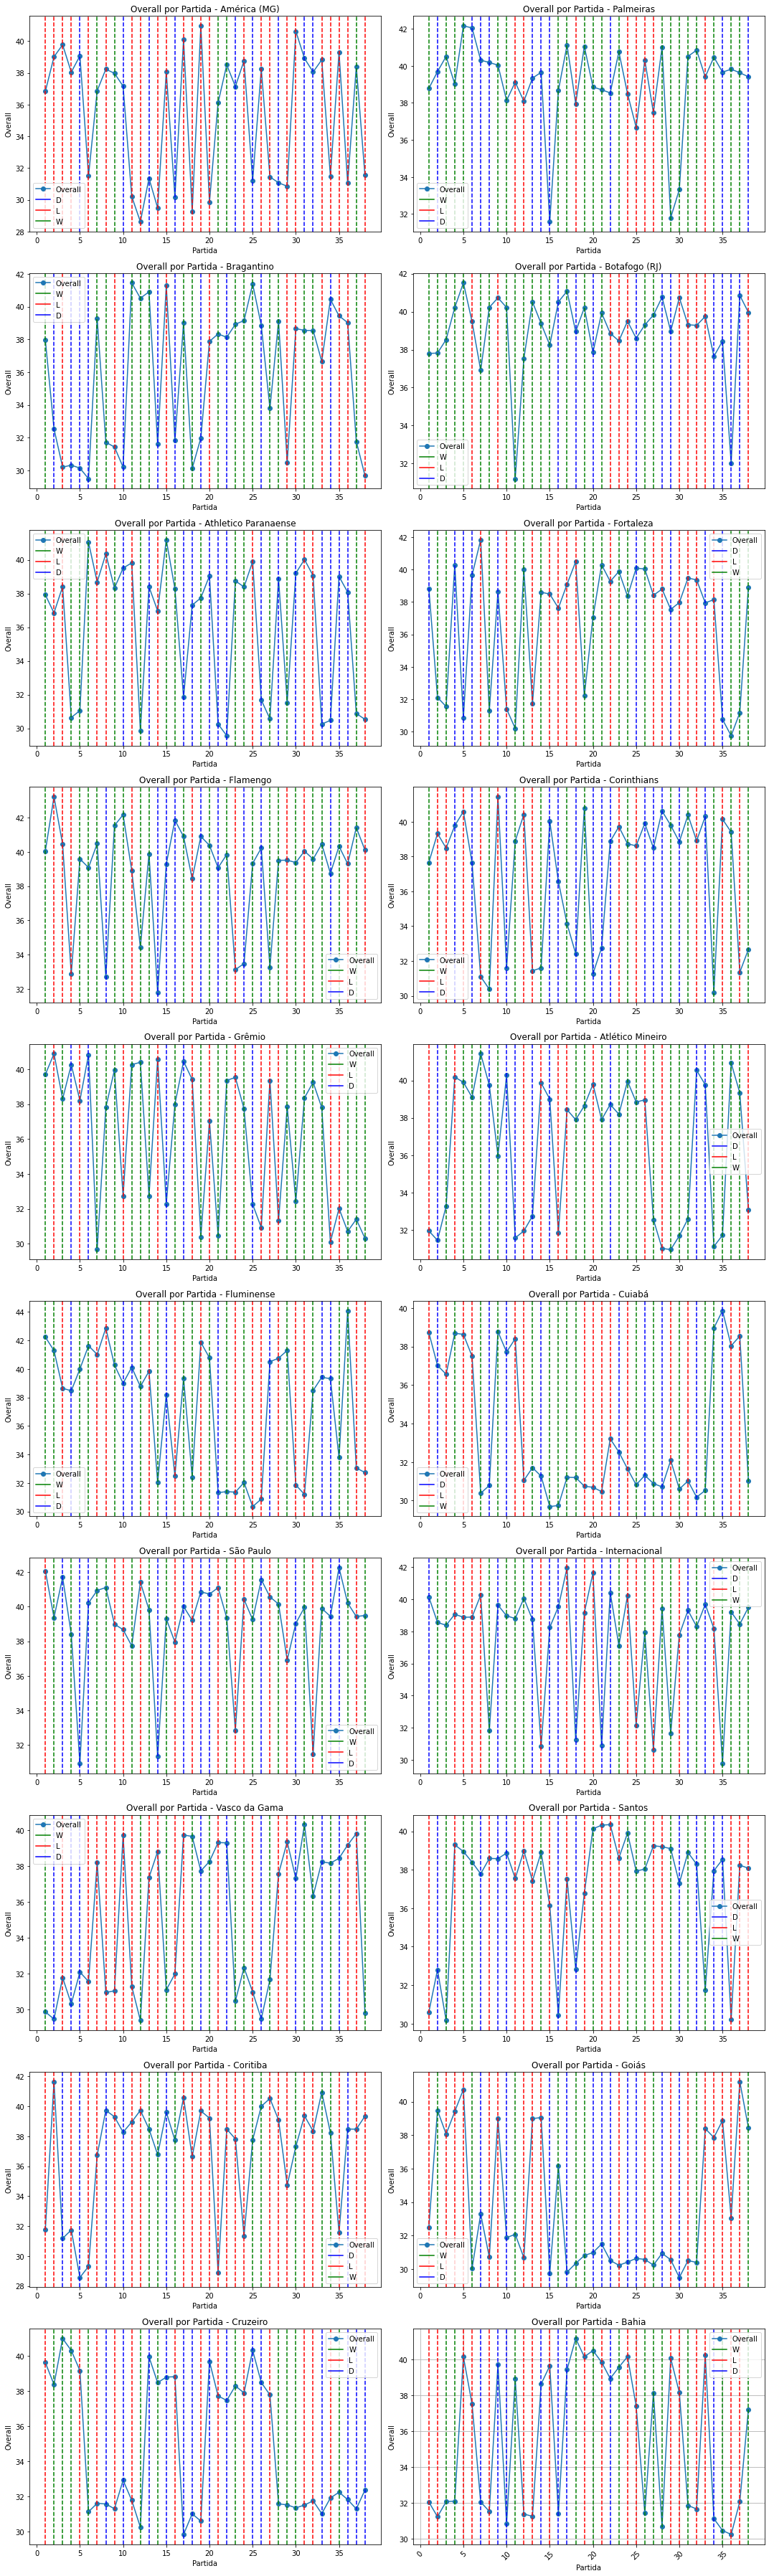

In [45]:
# Obtendo a lista única de times
teams = df_Analysis['Time Casa'].unique()

# Definindo o número de subplots com base no número de times
num_teams = len(teams)
num_cols = 2  # 2 subplots por linha
num_rows = (num_teams + 1) // num_cols  # Divisão arredondada para cima

# Criando subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Iterar sobre os times e plotar os gráficos
for i, team in enumerate(teams):
    row = i // num_cols
    col = i % num_cols
    performanceChart(axes[row, col], team)

# Removendo subplots não utilizados, caso necessário
for i in range(len(teams), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

ALGORITIMO GENÉTICO PARA ENCONTRAR A MELHOR FORMAÇÃO POR EQUIPE

In [46]:
# Função para avaliar a qualidade de uma formação
def evaluate_formation(formation, df_teamSelected):
    overall_total = 0
    for position, qty in formation.items():
        players_in_position = df_teamSelected[df_teamSelected['Sector'] == position][['Player', 'Overall']].values.tolist()
        if len(players_in_position) < qty:
            return 0  # Formação inválida, não há jogadores suficientes para preencher
        players_in_position.sort(key=lambda x: x[1], reverse=True)
        overall_total += sum(overall for _, overall in players_in_position[:qty])  # Soma dos overalls dos jogadores na posição
    return overall_total

In [47]:
# Função para gerar uma população inicial de escalações
def generate_initial_population(population_size, formation):
    population = []
    for _ in range(population_size):
        formation_instance = {position: formation[position] for position in formation}
        population.append(formation_instance)
    return population

In [48]:
# Função para cruzar dois indivíduos (escalações)
def crossover(individual1, individual2):
    child = {}
    for position in individual1:
        child[position] = random.choice([individual1[position], individual2[position]])
    return child

In [49]:
# Função para mutar um indivíduo (escalação)
def mutation(individual, mutation_rate):
    for position in individual:
        if random.random() < mutation_rate:
            individual[position] = random.randint(1, 4)
    return individual

In [50]:
def find_best_formation(formation, population_size, mutation_rate, num_generations, df_teamSelected):
    population = generate_initial_population(population_size, formation)
    for _ in range(num_generations):
        population = sorted(population, key=lambda x: evaluate_formation(x, df_teamSelected), reverse=True)
        new_population = []
        for _ in range(population_size // 2):
            parent1 = random.choice(population[:population_size // 2])
            parent2 = random.choice(population[:population_size // 2])
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.append(mutation(child1, mutation_rate))
            new_population.append(mutation(child2, mutation_rate))
        population = new_population
    best_formation = max(population, key=lambda x: evaluate_formation(x, df_teamSelected))
    
    # Selecionar os melhores jogadores para cada posição
    final_best_formation = {}
    for position, qty in formation.items():
        players_in_position = df_teamSelected[df_teamSelected['Sector'] == position][['Player', 'Overall']].values.tolist()
        players_in_position.sort(key=lambda x: x[1], reverse=True)  # Ordenar jogadores por overall
        final_best_formation[position] = (players_in_position[:qty], qty)  # Adiciona a quantidade como segundo elemento da tupla
    
    return final_best_formation, evaluate_formation(best_formation, df_teamSelected)

In [51]:
# Iterar sobre os times do DataFrame
def playersFormation(team, formation):

    # Agrupar o segundo DataFrame pelo time, posição e nome do jogador e somar os minutos em campo
    if(team == 'TODOS'):
        minutesPlayer = df_Players.groupby(['Team', 'Sector', 'Player'])['Min'].sum()
    else:
        minutesPlayer = df_Players[(df_Players['Team'] == team)].groupby(['Team', 'Sector', 'Player'])['Min'].sum()

    # Filtrar o segundo DataFrame para jogadores com mais de 450 minutos em campo
    minutesPlayer = minutesPlayer[minutesPlayer > 450]

    # Filtrar o DataFrame por time
    if(team == 'TODOS'):
        df_teamStart = df_Overall
    else:
        df_teamStart = df_Overall[(df_Overall['Team'] == team)]
        
    # Remove a coluna da partida
    df_teamStart = df_teamStart.drop(columns=['Game'])
    # Calculando a média
    meanPlayer = df_teamStart.groupby(['Player', 'Team', 'Sector']).mean().round(2).reset_index()

    # Unindo os dados não numéricos originais com as médias calculadas
    result = pd.merge(df_teamStart.drop(columns=['Bola parada', 'Recuperação', 'Passe', 'Bola perdida', 'Chute', 'Falta recebida', 'Falta cometida', 'Cartão', 'Interceptação', 'Bloqueio', 'Impedimento', 'Tiro de meta']), meanPlayer, on=['Player', 'Team', 'Sector'])

    # Remove quaisquer linhas duplicadas
    result.drop_duplicates(inplace=True)

    # Calculando a média das colunas
    result['Overall'] = result.loc[:, 'Bola parada':'Tiro de meta'].mean(axis=1).round(2)

    # Removendo as colunas 'Bola parada' até 'Tiro de meta'
    df_team = result.drop(columns=['Team','Bola parada', 'Recuperação', 'Passe', 'Bola perdida', 'Chute', 'Falta recebida', 'Falta cometida', 'Cartão', 'Interceptação', 'Bloqueio', 'Impedimento', 'Tiro de meta'])

    # Resetando o índice
    df_team = df_team.sort_values(by=['Player'], ascending=[True]).reset_index(drop=True)

    # Convertendo a coluna "Overall" para inteiro
    df_team["Overall"] = df_team["Overall"].astype('double')

    # Crie uma lista de jogadores e setores presentes em minutesPlayer
    df_Teams_Minutes = minutesPlayer.reset_index()[['Player', 'Sector']]

    # Filtrar df_team apenas para os jogadores e setores presentes em players_in_minutesPlayer
    df_team = df_team[df_team[['Player', 'Sector']].apply(tuple, axis=1).isin(df_Teams_Minutes.apply(tuple, axis=1))]

    # Faz a quebra da formação para numeral
    formation = formation.split("-")

    listFormation = {}

    # Preenche a variável com a formação de melhor performace
    if(len(formation) == 3):
        listFormation = {'GK': 1, 'DF': int(formation[0]), 'MCD': 1, 'MCA': int(formation[1]) - 1, 'ATA': int(formation[2])}
        formation = str(formation[0]) + '-1-' + str(formation[1]) + '-' + str(formation[2])
    elif(len(formation) == 4):
        listFormation = {'GK': 1, 'DF': int(formation[0]), 'MCD': int(formation[1]), 'MCA': int(formation[2]), 'ATA': int(formation[3])}
        formation = str(formation[0]) + '-' + str(formation[1]) + '-' + str(formation[2]) + '-' + str(formation[3])
    
    # Com o dataFrame definido, inicia o algoritimo genético
    # Parâmetros do algoritmo genético
    population_size = 100
    mutation_rate = 0.1
    num_generations = 100

    # Encontrar a melhor escalação
    best_formation, overall_total = find_best_formation(listFormation, population_size, mutation_rate, num_generations, df_team)
    
    # Guarda a melhor formação
    data = []
    
    selected_players = set()  # Para rastrear os jogadores já selecionados
    for position, (players, qty) in best_formation.items():
        # Selecionar jogadores únicos para cada posição
        unique_players = set()
        players_in_position = df_team[df_team['Sector'] == position][['Player', 'Overall']].values.tolist()
        for player, overall in players_in_position:
            if player not in selected_players:  # Verificar se o jogador já foi selecionado
                unique_players.add((player, overall))
        unique_players = sorted(unique_players, key=lambda x: x[1], reverse=True)[:qty]  # Selecionar os melhores jogadores para a posição
        selected_players.update(player for player, _ in unique_players)  # Adicionar os jogadores selecionados ao conjunto de jogadores selecionados
        for player, overall in unique_players:
            data.append({'Team': team, 'Sector': position, 'Player': player, 'Formation': formation, 'Overall': overall})

    return pd.DataFrame(data)

In [52]:
# Dataframe para armazenar as melhores escalações
df_lineup = pd.DataFrame()

In [53]:
dfs = []

# Iterar sobre os times do DataFrame
for team in df_Analysis['Time Casa'].unique():

    # Filtrando o DataFrame para partidas do time em casa com resultado WH
    home = df_Analysis[(df_Analysis['Time Casa'] == team) & (df_Analysis['Resultado'] == 'WH')]

    # Filtrando o DataFrame para partidas do time fora com resultado WA
    away = df_Analysis[(df_Analysis['Time Fora'] == team) & (df_Analysis['Resultado'] == 'WA')]

    # Concatenando os dataframes filtrados
    schema = pd.concat([home, away])

    # Contando a frequência de cada esquema casa e fora
    frequencyScheme = schema['Esquema Casa'].append(schema['Esquema Fora']).value_counts()

    # Encontrando o esquema mais frequente
    mostFrequentScheme = frequencyScheme.idxmax()

    dfs.append(playersFormation(team, mostFrequentScheme)) 

# Inclui a seleção do campeonato na análise
dfs.append(playersFormation('TODOS', '4-2-3-1')) 

# Concatene todos os DataFrames na lista dfs em um único DataFrame df_lineup
df_lineup = pd.concat(dfs, ignore_index=True)    

In [54]:
#Algoritimo génitico
df_lineup[df_lineup['Team'] == 'Botafogo (RJ)'].head(11)

,Team,Sector,Player,Formation,Overall
33,Botafogo (RJ),GK,Lucas Perri,4-2-3-1,42.11
34,Botafogo (RJ),DF,Víctor Cuesta,4-2-3-1,41.74
35,Botafogo (RJ),DF,Leonel Di Plácido,4-2-3-1,41.17
36,Botafogo (RJ),DF,Adryelson,4-2-3-1,41.00
37,Botafogo (RJ),DF,Fernando Marçal,4-2-3-1,40.41
38,Botafogo (RJ),MCD,Marlon Freitas,4-2-3-1,42.95
39,Botafogo (RJ),MCD,Gabriel,4-2-3-1,38.64
40,Botafogo (RJ),MCA,Carlos Eduardo,4-2-3-1,37.76
41,Botafogo (RJ),MCA,João Victor Santos Sá,4-2-3-1,36.66
42,Botafogo (RJ),MCA,Matias Segovia,4-2-3-1,35.95


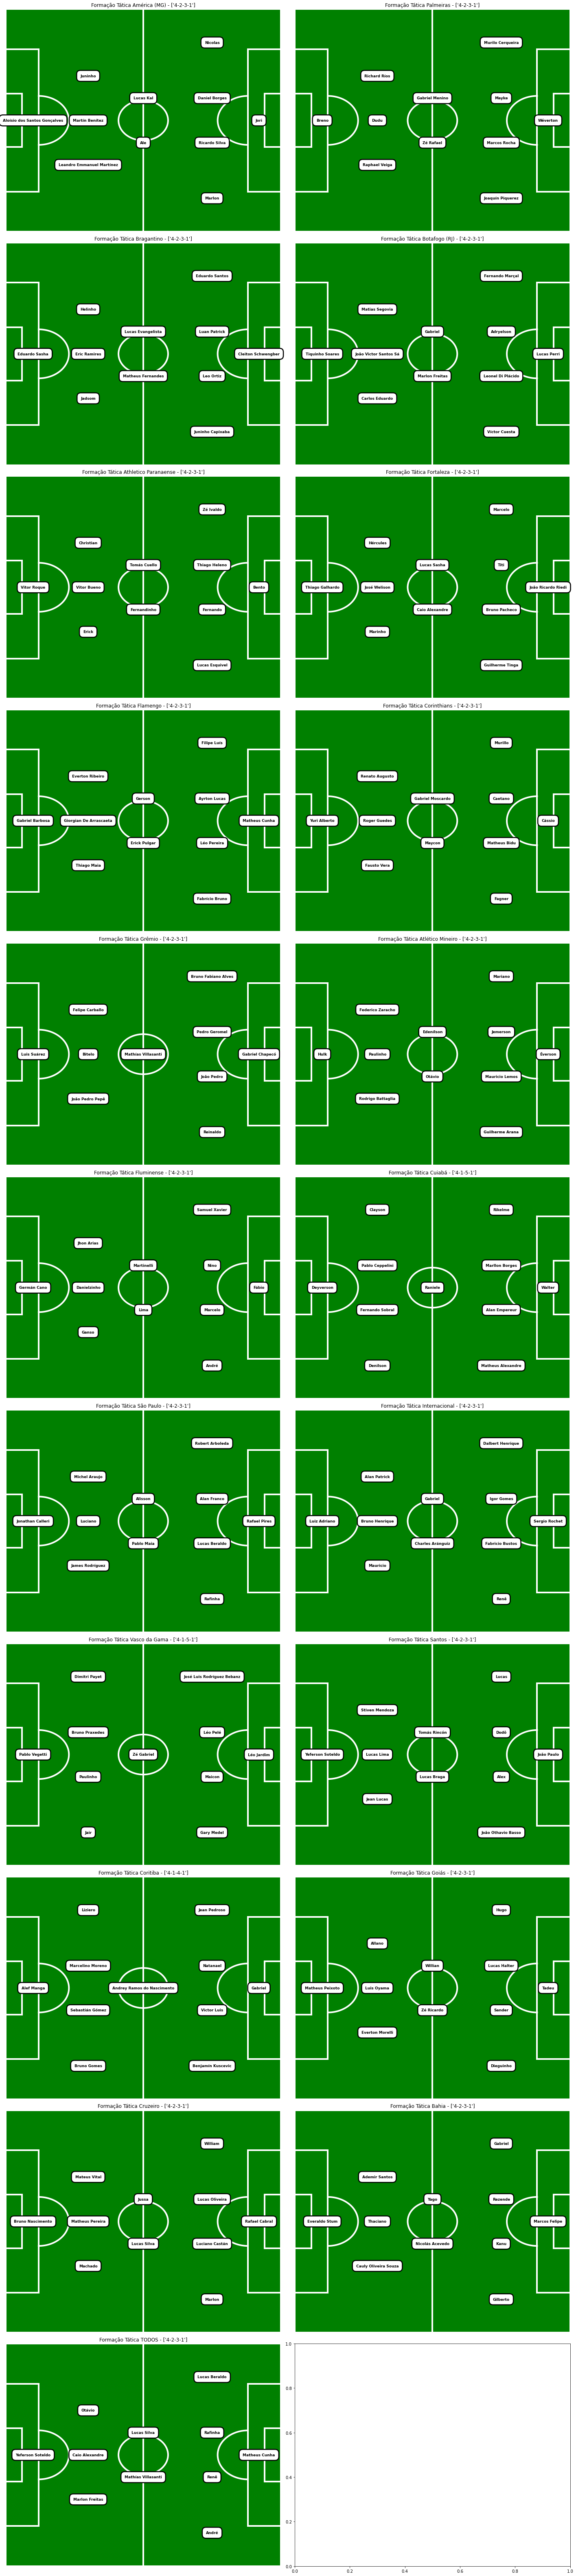

In [55]:
# Função para converter coordenadas de orientação vertical para horizontal
def converter_coordenadas(coordenada):
    x, y = coordenada
    return (y, 100 - x)

# Número de times e formações
n_times = len(df_lineup['Team'].unique())
formacoes_por_linha = 2
n_linhas = (n_times + formacoes_por_linha - 1) // formacoes_por_linha

# Tamanho do gráfico
largura_grafico = 20
altura_grafico = 8 * n_linhas

# Configurações do gráfico
fig, axs = plt.subplots(n_linhas, formacoes_por_linha, figsize=(largura_grafico, altura_grafico))

# Iterar sobre os times e plotar os campos
for i, (team, ax) in enumerate(zip(df_lineup['Team'].unique(), axs.flatten())):

    # Pega a formação tática de cada equipe
    formation = df_lineup[df_lineup['Team'] == team]['Formation'].unique()

    # Configurações do subplot
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.axis('off')

    # Desenhar o gramado
    ax.add_patch(plt.Rectangle((0, 0), 100, 100, fill=True, color='green', zorder=0))  # Gramado

    # Desenhar as linhas do campo
    ax.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], color='white', linewidth=4, zorder=1)  # Linha de contorno
    ax.plot([50, 50], [0, 100], color='white', linewidth=4, zorder=1)  # Linha do meio campo
    ax.add_patch(plt.Rectangle((0, 18), 12, 64, fill=False, edgecolor='white', linewidth=4, zorder=1))  # Grande área esquerda
    ax.add_patch(plt.Rectangle((88, 18), 12, 64, fill=False, edgecolor='white', linewidth=4, zorder=1))  # Grande área direita
    ax.add_patch(plt.Rectangle((0, 38), 6, 24, fill=False, edgecolor='white', linewidth=4, zorder=1))  # Pequena área esquerda
    ax.add_patch(plt.Rectangle((94, 38), 6, 24, fill=False, edgecolor='white', linewidth=4, zorder=1))  # Pequena área direita

    # Circulo central
    ax.add_patch(plt.Circle((50, 50), 9, color='white', fill=False, linewidth=4, zorder=1))

    # Meia lua da grande área esquerda
    theta_left = np.linspace(-np.pi/2, np.pi/2, 100)
    x_left = 12 + 11 * np.cos(theta_left)  # Ajuste na posição
    y_left = 50 + 11 * np.sin(theta_left)
    ax.plot(x_left, y_left, color='white', linewidth=4, zorder=1)

    # Meia lua da grande área direita
    theta_right = np.linspace(np.pi/2, 3*np.pi/2, 100)
    x_right = 88 + 11 * np.cos(theta_right)
    y_right = 50 + 11 * np.sin(theta_right)
    ax.plot(x_right, y_right, color='white', linewidth=4, zorder=1)

    # Criando o DataFrame com coordenadas dos jogadores no campo (ajustadas para as dimensões do campo de futebol)
    df_coordenadas = pd.DataFrame([('GK', 92, 50)], columns=['Sector', 'X', 'Y'])
    
    lineDF = []
    if(len(df_lineup[(df_lineup['Team'] == team) &  (df_lineup['Sector'] == 'DF')]) == 3):
        lineDF = pd.DataFrame([('DF', 75, 20), ('DF', 75, 50), ('DF', 75, 80)], columns=['Sector', 'X', 'Y'])
    elif(len(df_lineup[(df_lineup['Team'] == team) &  (df_lineup['Sector'] == 'DF')]) == 4):
        lineDF = pd.DataFrame([('DF', 75, 15), ('DF', 75, 40), ('DF', 75, 60), ('DF', 75, 85)], columns=['Sector', 'X', 'Y'])
    elif(len(df_lineup[(df_lineup['Team'] == team) & (df_lineup['Sector'] == 'DF')]) == 5):
        lineDF = pd.DataFrame([('DF', 75, 15), ('DF', 75, 30), ('DF', 75, 50), ('DF', 75, 70), ('DF', 75, 85)], columns=['Sector', 'X', 'Y'])
    
    # Criando um novo DataFrame com a linha a ser adicionada
    df_coordenadas = df_coordenadas.append(lineDF, ignore_index=True)
    
    lineMCD = []
    if(len(df_lineup[(df_lineup['Team'] == team) &  (df_lineup['Sector'] == 'MCD')]) == 1):
        lineMCD = pd.DataFrame([('MCD', 50, 50)], columns=['Sector', 'X', 'Y'])
    elif(len(df_lineup[(df_lineup['Team'] == team) &  (df_lineup['Sector'] == 'MCD')]) == 2):
        lineMCD = pd.DataFrame([('MCD', 50, 40), ('MCD', 50, 60)], columns=['Sector', 'X', 'Y'])
    
    # Criando um novo DataFrame com a linha a ser adicionada
    df_coordenadas = df_coordenadas.append(lineMCD, ignore_index=True)
    
    lineMCA = []
    if(len(df_lineup[(df_lineup['Team'] == team) &  (df_lineup['Sector'] == 'MCA')]) == 3):
        lineMCA = pd.DataFrame([('MCA', 30, 30), ('MCA', 30, 50), ('MCA', 30, 70)], columns=['Sector', 'X', 'Y'])
    elif(len(df_lineup[(df_lineup['Team'] == team) &  (df_lineup['Sector'] == 'MCA')]) == 4):
        lineMCA = pd.DataFrame([('MCA', 30, 15), ('MCA', 30, 40), ('MCA', 30, 60), ('MCA', 30, 85)], columns=['Sector', 'X', 'Y'])
    
    # Criando um novo DataFrame com a linha a ser adicionada
    df_coordenadas = df_coordenadas.append(lineMCA, ignore_index=True)
    
    # Criando um novo DataFrame com a linha a ser adicionada
    lineATA = pd.DataFrame([('ATA', 10, 50)], columns=['Sector', 'X', 'Y'])
    df_coordenadas = df_coordenadas.append(lineATA, ignore_index=True)
    
    # Plotando os jogadores e armazenando suas coordenadas
    for i, row in df_lineup[df_lineup['Team'] == team].iterrows():
    
        player = row['Player']
        sector = row['Sector']
        
        x = df_coordenadas[df_coordenadas['Sector'] == sector]['X'].iloc[0]
        y = df_coordenadas[df_coordenadas['Sector'] == sector]['Y'].iloc[0]
    
        ax.text(x, y, player, fontsize=9, ha='center', va='center', zorder=2, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1', linewidth=2.5), fontweight='bold')
    
        # Excluindo a linha do DataFrame
        df_coordenadas = df_coordenadas.drop(df_coordenadas[df_coordenadas['Sector'] == sector].index[0])

    ax.set_title(f"Formação Tática {team} - {formation}")

plt.tight_layout()
plt.show()

Machine Learning

In [56]:
# Importando as lib de preprocessamento
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Importando libs para plotar grafico.
import seaborn as sns
import matplotlib. pyplot as plt
# Importando a lib para separar os dados em treino e teste
from sklearn.model_selection import train_test_split
# Importando a lib para encontrar os melhores parâmetros
from sklearn.model_selection import GridSearchCV
# Importando a lib para o modelo SVM
from sklearn import svm
# impostando o classifation report para avaliar o modelo.
from sklearn.metrics import classification_report, accuracy_score
# Importando a lib para o modelo xgboost
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

c:\Users\Igors\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [57]:
# Convertendo as variáveis para valor numérico
encoder_schema_home = OrdinalEncoder()
df_Analysis['Esquema Casa'] = encoder_schema_home.fit_transform(df_Analysis['Esquema Casa'].values.reshape(-1,1))
encoder_schema_away = OrdinalEncoder()
df_Analysis['Esquema Fora'] = encoder_schema_away.fit_transform(df_Analysis['Esquema Fora'].values.reshape(-1,1))
encoder_result = OrdinalEncoder()
df_Analysis['Resultado'] = encoder_result.fit_transform(df_Analysis['Resultado'].values.reshape(-1,1))

In [58]:
# Normalizando os dados das variáveis
scaler_home_GK = MinMaxScaler()
df_Analysis['GK Casa'] = scaler_home_GK.fit_transform(df_Analysis['GK Casa'].values.reshape(-1,1))
scaler_home_DF = MinMaxScaler()
df_Analysis['DF Casa'] = scaler_home_DF.fit_transform(df_Analysis['DF Casa'].values.reshape(-1,1))
scaler_home_MCD = MinMaxScaler()
df_Analysis['MCD Casa'] = scaler_home_MCD.fit_transform(df_Analysis['MCD Casa'].values.reshape(-1,1))
scaler_home_MCA = MinMaxScaler()
df_Analysis['MCA Casa'] = scaler_home_MCA.fit_transform(df_Analysis['MCA Casa'].values.reshape(-1,1))
scaler_home_ATA = MinMaxScaler()
df_Analysis['ATA Casa'] = scaler_home_ATA.fit_transform(df_Analysis['ATA Casa'].values.reshape(-1,1))
scaler_home_Possession = MinMaxScaler()
df_Analysis['Posse Casa'] = scaler_home_Possession.fit_transform(df_Analysis['Posse Casa'].values.reshape(-1,1))
scaler_home_PassingAccuracy = MinMaxScaler()
df_Analysis['Precisão Passe Casa'] = scaler_home_PassingAccuracy.fit_transform(df_Analysis['Precisão Passe Casa'].values.reshape(-1,1))
scaler_home_ShotsTarget = MinMaxScaler()
df_Analysis['Chutes Gol Casa'] = scaler_home_ShotsTarget.fit_transform(df_Analysis['Chutes Gol Casa'].values.reshape(-1,1))

scaler_away_GK = MinMaxScaler()
df_Analysis['GK Fora'] = scaler_away_GK.fit_transform(df_Analysis['GK Fora'].values.reshape(-1,1))
scaler_away_DF = MinMaxScaler()
df_Analysis['DF Fora'] = scaler_away_DF.fit_transform(df_Analysis['DF Fora'].values.reshape(-1,1))
scaler_away_MCD = MinMaxScaler()
df_Analysis['MCD Fora'] = scaler_away_MCD.fit_transform(df_Analysis['MCD Fora'].values.reshape(-1,1))
scaler_away_MCA = MinMaxScaler()
df_Analysis['MCA Fora'] = scaler_away_MCA.fit_transform(df_Analysis['MCA Fora'].values.reshape(-1,1))
scaler_away_ATA = MinMaxScaler()
df_Analysis['ATA Fora'] = scaler_away_ATA.fit_transform(df_Analysis['ATA Fora'].values.reshape(-1,1))
scaler_away_Possession = MinMaxScaler()
df_Analysis['Posse Fora'] = scaler_away_Possession.fit_transform(df_Analysis['Posse Fora'].values.reshape(-1,1))
scaler_away_PassingAccuracy = MinMaxScaler()
df_Analysis['Precisão Passe Fora'] = scaler_away_PassingAccuracy.fit_transform(df_Analysis['Precisão Passe Fora'].values.reshape(-1,1))
scaler_away_ShotsTarget = MinMaxScaler()
df_Analysis['Chutes Gol Fora'] = scaler_away_ShotsTarget.fit_transform(df_Analysis['Chutes Gol Fora'].values.reshape(-1,1))

In [59]:
# Após ter ajustado (fit) o encoder no seu dataframe
print("Categorias codificadas para 'Resultado':", encoder_result.categories_[0])

Categorias codificadas para 'Resultado': ['D' 'WA' 'WH']


In [60]:
#Conta o número de saídas com 0 = Derrota, 1 = Empate, 2 = Vitória
df_Analysis['Resultado'].value_counts()

2.0    178
1.0    104
0.0     98
Name: Resultado, dtype: int64

In [61]:
df_Analysis.drop('Partida', axis=1, inplace=True)
df_Analysis.drop('Time Casa', axis=1, inplace=True)
df_Analysis.drop('Time Fora', axis=1, inplace=True)

In [62]:
df_Analysis.head(3)

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,Esquema Fora,GK Fora,DF Fora,MCD Fora,MCA Fora,ATA Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Resultado
0,10.0,0.238874,0.276099,0.781359,0.203297,0.355812,0.377358,0.451613,0.57,10.0,0.740529,0.326601,0.901814,0.927112,0.878991,0.622642,0.800000,0.581395,1.0
1,10.0,0.681283,0.627060,0.806796,0.379121,0.011561,0.490566,0.709677,0.75,11.0,0.488206,0.481246,0.714511,0.827884,0.813744,0.509434,0.657143,0.383721,2.0
2,10.0,0.340314,0.486264,0.754951,0.336081,0.416827,0.547170,0.483871,0.66,6.0,0.434596,0.533756,0.000000,0.908719,0.795465,0.452830,0.400000,0.383721,2.0


In [63]:
# Aplica a correlação de pearson
df_Analysis.corr(method = 'pearson')

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,Esquema Fora,GK Fora,DF Fora,MCD Fora,MCA Fora,ATA Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Resultado
Esquema Casa,1.000000,0.019346,0.091981,-0.549945,-0.056119,0.045571,0.109108,0.097825,-0.063345,0.030515,-0.004661,-0.047872,-0.045020,0.081485,-0.042822,-0.109221,-0.064155,-0.029897,-0.108687
GK Casa,0.019346,1.000000,0.088408,0.061063,-0.097903,-0.031042,0.175255,0.083037,0.183110,0.007228,-0.040203,-0.122782,-0.052247,0.013444,0.049350,-0.175408,-0.188681,0.040733,-0.009611
DF Casa,0.091981,0.088408,1.000000,0.119821,-0.041507,0.077595,0.578357,0.538663,-0.145485,-0.030607,0.072769,-0.303214,-0.073142,-0.027902,-0.020807,-0.578182,-0.316305,0.069619,-0.017375
MCD Casa,-0.549945,0.061063,0.119821,1.000000,-0.152086,-0.034049,0.142047,0.192899,0.007152,-0.017884,-0.026698,-0.055387,-0.000890,-0.047385,0.016218,-0.141829,-0.034730,0.038553,0.140310
MCA Casa,-0.056119,-0.097903,-0.041507,-0.152086,1.000000,0.027586,0.050653,0.118868,-0.128510,-0.077753,-0.015684,-0.084544,0.014171,-0.057420,0.025964,-0.050466,0.073817,0.015904,0.012528
ATA Casa,0.045571,-0.031042,0.077595,-0.034049,0.027586,1.000000,0.083135,0.223013,-0.037685,-0.017487,-0.074884,-0.145875,-0.019159,0.057497,-0.048077,-0.083221,0.066063,-0.034242,0.027647
Posse Casa,0.109108,0.175255,0.578357,0.142047,0.050653,0.083135,1.000000,0.668895,-0.188859,0.043526,-0.050382,-0.645823,-0.160984,-0.130797,-0.045672,-0.999988,-0.715091,0.029728,-0.089900
Precisão Passe Casa,0.097825,0.083037,0.538663,0.192899,0.118868,0.223013,0.668895,1.000000,-0.144292,-0.013557,-0.015018,-0.352113,-0.097881,0.039843,0.017275,-0.668634,-0.088104,-0.000074,0.072243
Chutes Gol Casa,-0.063345,0.183110,-0.145485,0.007152,-0.128510,-0.037685,-0.188859,-0.144292,1.000000,0.017685,0.047963,0.081554,-0.001797,0.054135,-0.065719,0.188583,0.077830,0.182203,0.205974
Esquema Fora,0.030515,0.007228,-0.030607,-0.017884,-0.077753,-0.017487,0.043526,-0.013557,0.017685,1.000000,0.013208,-0.016222,-0.683562,0.071076,-0.011042,-0.043946,-0.080284,-0.014839,0.025527


<AxesSubplot:>

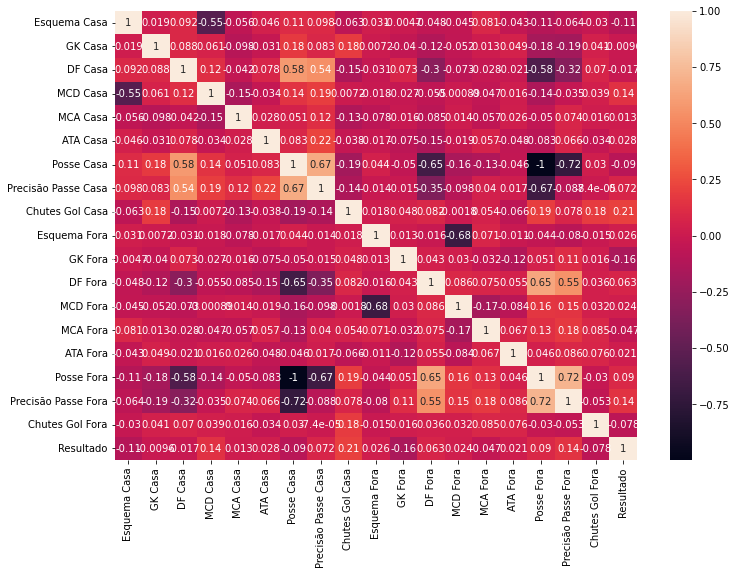

In [64]:
# Exibe a correlação de pearson
a4_dim = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dim)
sns.heatmap(df_Analysis.corr(method = 'pearson'), annot=True)

In [65]:
# Aplica a correlação de spearman
df_Analysis.corr(method = 'spearman')

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,Esquema Fora,GK Fora,DF Fora,MCD Fora,MCA Fora,ATA Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Resultado
Esquema Casa,1.000000,0.000641,0.055169,-0.567478,-0.011667,0.061391,0.089738,0.050836,-0.051291,0.027307,0.001676,-0.051904,-0.039753,-0.043944,-0.049140,-0.090031,-0.065327,-0.031852,-0.115469
GK Casa,0.000641,1.000000,0.097128,0.097044,-0.110378,-0.027327,0.178583,0.095736,0.174664,0.004727,-0.045832,-0.133416,-0.083217,0.019042,0.051814,-0.178808,-0.241107,0.056079,-0.002478
DF Casa,0.055169,0.097128,1.000000,0.137279,-0.033144,0.064156,0.574425,0.555038,-0.161481,-0.046621,0.051573,-0.290831,-0.142822,-0.090415,-0.077036,-0.574188,-0.314566,0.072346,-0.025724
MCD Casa,-0.567478,0.097044,0.137279,1.000000,-0.154791,-0.001934,0.213733,0.286469,0.037462,0.035210,-0.040182,-0.086412,-0.069943,-0.032476,0.036940,-0.213436,-0.063948,0.009272,0.157787
MCA Casa,-0.011667,-0.110378,-0.033144,-0.154791,1.000000,-0.005808,0.044756,0.085371,-0.128043,-0.071520,0.007868,-0.057789,0.019059,-0.077482,-0.003446,-0.044535,0.044740,0.006317,0.002620
ATA Casa,0.061391,-0.027327,0.064156,-0.001934,-0.005808,1.000000,0.061842,0.220391,-0.039400,-0.015141,-0.076647,-0.118410,-0.053201,0.088539,0.015172,-0.061999,0.100285,-0.043672,0.039937
Posse Casa,0.089738,0.178583,0.574425,0.213733,0.044756,0.061842,1.000000,0.660709,-0.178953,0.040185,-0.028510,-0.631663,-0.256196,-0.210163,-0.050995,-0.999985,-0.717116,0.037761,-0.095175
Precisão Passe Casa,0.050836,0.095736,0.555038,0.286469,0.085371,0.220391,0.660709,1.000000,-0.135078,-0.006096,-0.012980,-0.323619,-0.149070,-0.017525,0.069763,-0.660409,-0.095453,0.012367,0.069934
Chutes Gol Casa,-0.051291,0.174664,-0.161481,0.037462,-0.128043,-0.039400,-0.178953,-0.135078,1.000000,0.011793,0.066485,0.097952,0.016934,0.065479,-0.062500,0.178528,0.074188,0.023171,0.278744
Esquema Fora,0.027307,0.004727,-0.046621,0.035210,-0.071520,-0.015141,0.040185,-0.006096,0.011793,1.000000,-0.004485,-0.008354,-0.580629,0.015339,-0.048020,-0.040644,-0.072355,-0.030934,0.004405


<AxesSubplot:>

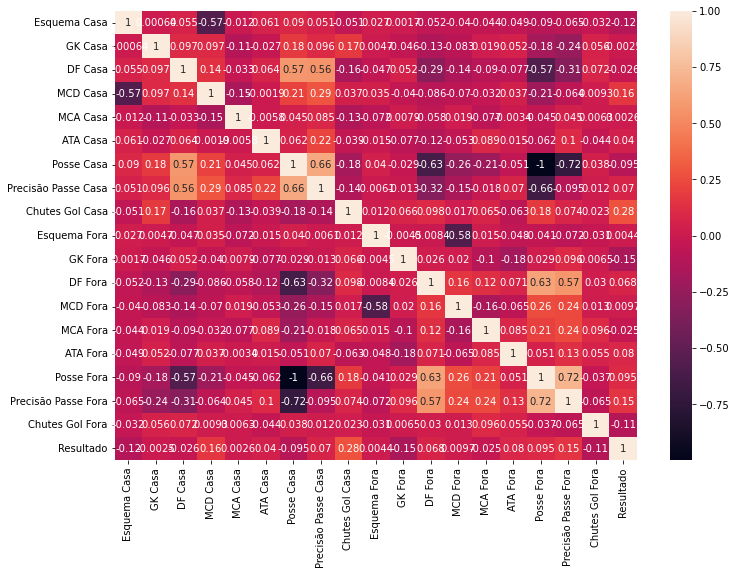

In [66]:
# Exibe a correlação de spearman
a4_dim = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dim)
sns.heatmap(df_Analysis.corr(method = 'spearman'), annot=True)

In [67]:
# Armazenando as variáveis de entrada para o meu modelo.
x = df_Analysis[['Esquema Casa', 'GK Casa', 'DF Casa', 'MCD Casa', 'MCA Casa', 'ATA Casa',
                  'Posse Casa', 'Precisão Passe Casa', 'Chutes Gol Casa',
                 'Esquema Fora', 'GK Fora', 'DF Fora', 'MCD Fora', 'MCA Fora', 'ATA Fora',
                  'Posse Fora', 'Precisão Passe Fora', 'Chutes Gol Fora']]

x.head(2)

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,Esquema Fora,GK Fora,DF Fora,MCD Fora,MCA Fora,ATA Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora
0,10.0,0.238874,0.276099,0.781359,0.203297,0.355812,0.377358,0.451613,0.57,10.0,0.740529,0.326601,0.901814,0.927112,0.878991,0.622642,0.800000,0.581395
1,10.0,0.681283,0.627060,0.806796,0.379121,0.011561,0.490566,0.709677,0.75,11.0,0.488206,0.481246,0.714511,0.827884,0.813744,0.509434,0.657143,0.383721


In [68]:
# Armazenando as variável de saída para o meu modelo
y = df_Analysis['Resultado']
y.head(2)

0    1.0
1    2.0
Name: Resultado, dtype: float64

In [69]:
# Realizando a separação em treino e teste para x e y (70% treino teste)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

REDE NEURAL

In [70]:
# Normalizar os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [71]:
# Definir os parâmetros para busca em grade
parameters = {
    'hidden_layer_sizes': [(100,), (100, 100), (200, 100), (200, 200)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 2000]
}

In [72]:
# Inicializar GridSearchCV
grid_search = GridSearchCV(MLPClassifier(), parameters, cv=5, n_jobs=-1)

# Treinar o modelo
grid_search.fit(x_train_scaled, y_train)

c:\Users\Igors\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (100, 100), (200, 100),
                                                (200, 200)],
                         'max_iter': [500, 1000, 2000]})

In [73]:
# Exibir os melhores parâmetros encontrados
print('Melhores parâmetros encontrados:')
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'max_iter': 500}


In [74]:
# Avaliar o melhor modelo
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test_scaled, y_test)
print(f'Acurácia da Rede Neural: {accuracy * 100:.2f}%')

Acurácia da Rede Neural: 58.77%


APLICAÇÃO DO MODELO SVM

In [75]:
# C = parâmetro de regularização, está definido como 1.0, que é um valor moderado.
# Kernel = função kernel será usada
# gamma='auto' = ajuda a evitar overfitting
# Defina os hiperparâmetros para o SVM
param_grid_svm = {'C': [0.01, 0.1, 1, 10],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto'],
                  'class_weight': ['balanced', None]}  # Adicionando class_weight para lidar com classes desbalanceadas

# Instanciando o modelo SVM para classificação.
svm_model = svm.SVC()

In [76]:
# Aplique GridSearchCV e treinando o modelo
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [77]:
# Obter o melhor estimador retornado pelo GridSearchCV
best_svm_model = grid_search_svm.best_estimator_
# Imprima os melhores hiperparâmetros
print("Melhores Hiperparâmetros para SVM:", best_svm_model)

Melhores Hiperparâmetros para SVM: SVC(C=1, kernel='linear')


In [78]:
# Realizando uma predição utilizando o modelo otimizado
y_predict = grid_search_svm.predict(x_test)

In [79]:
# Avaliar o desempenho do modelo
print("Acurácia do modelo SVM:", accuracy_score(y_test, y_predict))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_predict))

Acurácia do modelo SVM: 0.6491228070175439

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.54      0.22      0.31        32
         1.0       0.61      0.71      0.66        28
         2.0       0.69      0.87      0.77        54

    accuracy                           0.65       114
   macro avg       0.61      0.60      0.58       114
weighted avg       0.63      0.65      0.61       114



TESTE MODELO SVM

In [80]:
# Dados da próxima partida
newMatch = {
    'Esquema Casa': ['4-2-3-1'],
    'GK Casa': [11.07],
    'DF Casa': [27.58],
    'MCD Casa': [28.72], 
    'MCA Casa': [12.20], 
    'ATA Casa': [14.50], 
    'Posse Casa': [46], 
    'Precisão Passe Casa': [74], 
    'Chutes Gol Casa': [12], 
    'Esquema Fora': ['4-2-2-2'],
    'GK Fora': [18.21],
    'DF Fora': [16.32],
    'MCD Fora': [35.55], 
    'MCA Fora': [16.00], 
    'ATA Fora': [19.65],
    'Posse Fora': [54], 
    'Precisão Passe Fora': [83], 
    'Chutes Gol Fora': [50],
}

# Converter para DataFrame
df_NewMatch = pd.DataFrame(newMatch)

# Aplicar as mesmas transformações aos dados da próxima partida
df_NewMatch['Esquema Casa'] = encoder_schema_home.transform(df_NewMatch['Esquema Casa'].values.reshape(-1,1))
df_NewMatch['Esquema Fora'] = encoder_schema_away.transform(df_NewMatch['Esquema Fora'].values.reshape(-1,1))

# Aplica a normalização
df_NewMatch['GK Casa'] = scaler_home_GK.transform(df_NewMatch['GK Casa'].values.reshape(-1,1))
df_NewMatch['DF Casa'] = scaler_home_DF.transform(df_NewMatch['DF Casa'].values.reshape(-1,1))
df_NewMatch['MCD Casa'] = scaler_home_MCD.transform(df_NewMatch['MCD Casa'].values.reshape(-1,1))
df_NewMatch['MCA Casa'] = scaler_home_MCA.transform(df_NewMatch['MCA Casa'].values.reshape(-1,1))
df_NewMatch['ATA Casa'] = scaler_home_ATA.transform(df_NewMatch['ATA Casa'].values.reshape(-1,1))
df_NewMatch['Posse Casa'] = scaler_home_Possession.transform(df_NewMatch['Posse Casa'].values.reshape(-1,1))
df_NewMatch['Precisão Passe Casa'] = scaler_home_PassingAccuracy.transform(df_NewMatch['Precisão Passe Casa'].values.reshape(-1,1))
df_NewMatch['Chutes Gol Casa'] = scaler_home_ShotsTarget.transform(df_NewMatch['Chutes Gol Casa'].values.reshape(-1,1))
df_NewMatch['GK Fora'] = scaler_away_GK.transform(df_NewMatch['GK Fora'].values.reshape(-1,1))
df_NewMatch['DF Fora'] = scaler_away_DF.transform(df_NewMatch['DF Fora'].values.reshape(-1,1))
df_NewMatch['MCD Fora'] = scaler_away_MCD.transform(df_NewMatch['MCD Fora'].values.reshape(-1,1))
df_NewMatch['MCA Fora'] = scaler_away_MCA.transform(df_NewMatch['MCA Fora'].values.reshape(-1,1))
df_NewMatch['ATA Fora'] = scaler_away_ATA.transform(df_NewMatch['ATA Fora'].values.reshape(-1,1))
df_NewMatch['Posse Fora'] = scaler_home_Possession.transform(df_NewMatch['Posse Fora'].values.reshape(-1,1))
df_NewMatch['Precisão Passe Fora'] = scaler_away_PassingAccuracy.transform(df_NewMatch['Precisão Passe Fora'].values.reshape(-1,1))
df_NewMatch['Chutes Gol Fora'] = scaler_away_ShotsTarget.transform(df_NewMatch['Chutes Gol Fora'].values.reshape(-1,1))

# Prever o resultado da próxima partida usando o melhor estimador retornado pelo GridSearchCV
resultPredict = best_svm_model.predict(df_NewMatch)

# Transformar o resultado previsto para o formato original
resultPredictEncoded = encoder_result.inverse_transform(resultPredict.reshape(-1, 1))

# Exibir o resultado da previsão
print("Resultado previsto para a próxima partida (Casa x Fora) com o overall de jogadores informados será:", resultPredictEncoded)

Resultado previsto para a próxima partida (Casa x Fora) com o overall de jogadores informados será: [['WA']]


APLICAÇÃO DO MODELO XGBoost

In [81]:
# Carregar o conjunto de dados de exemplo (Boston Housing Dataset)
boston = load_boston()
X, y = boston.data, boston.target

In [82]:
# Definir a grade de hiperparâmetros para busca
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Inicializar o modelo XGBoost
model = xgb.XGBClassifier()

In [83]:
# Inicializar o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='precision')
# Executar a busca em grade
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Igors\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [84]:
# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

Melhores Hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [85]:
# Fazer previsões no conjunto de teste usando o melhor modelo
best_model = grid_search.best_estimator_
y_predict = best_model.predict(x_test)

In [86]:
# Avaliar o desempenho do modelo
print("Acurácia do modelo XGBoost:", accuracy_score(y_test, y_predict))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_predict))

Acurácia do modelo XGBoost: 0.5877192982456141

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.20      0.03      0.05        32
         1.0       0.51      0.79      0.62        28
         2.0       0.67      0.81      0.73        54

    accuracy                           0.59       114
   macro avg       0.46      0.54      0.47       114
weighted avg       0.50      0.59      0.51       114



TESTE MODELO XGBoost

In [87]:
# Dados da próxima partida
newMatch = {
    'Esquema Casa': ['4-2-3-1'],
    'GK Casa': [11.07],
    'DF Casa': [27.58],
    'MCD Casa': [28.72], 
    'MCA Casa': [12.20], 
    'ATA Casa': [14.50], 
    'Posse Casa': [46], 
    'Precisão Passe Casa': [74], 
    'Chutes Gol Casa': [12], 
    'Esquema Fora': ['4-2-2-2'],
    'GK Fora': [18.21],
    'DF Fora': [16.32],
    'MCD Fora': [35.55], 
    'MCA Fora': [16.00], 
    'ATA Fora': [19.65],
    'Posse Fora': [54], 
    'Precisão Passe Fora': [83], 
    'Chutes Gol Fora': [50]
}

# Converter para DataFrame
df_NewMatch = pd.DataFrame(newMatch)

# Aplicar as mesmas transformações aos dados da próxima partida
df_NewMatch['Esquema Casa'] = encoder_schema_home.transform(df_NewMatch['Esquema Casa'].values.reshape(-1,1))
df_NewMatch['Esquema Fora'] = encoder_schema_away.transform(df_NewMatch['Esquema Fora'].values.reshape(-1,1))

# Aplica a normalização
df_NewMatch['GK Casa'] = scaler_home_GK.transform(df_NewMatch['GK Casa'].values.reshape(-1,1))
df_NewMatch['DF Casa'] = scaler_home_DF.transform(df_NewMatch['DF Casa'].values.reshape(-1,1))
df_NewMatch['MCD Casa'] = scaler_home_MCD.transform(df_NewMatch['MCD Casa'].values.reshape(-1,1))
df_NewMatch['MCA Casa'] = scaler_home_MCA.transform(df_NewMatch['MCA Casa'].values.reshape(-1,1))
df_NewMatch['ATA Casa'] = scaler_home_ATA.transform(df_NewMatch['ATA Casa'].values.reshape(-1,1))
df_NewMatch['Posse Casa'] = scaler_home_Possession.transform(df_NewMatch['Posse Casa'].values.reshape(-1,1))
df_NewMatch['Precisão Passe Casa'] = scaler_home_PassingAccuracy.transform(df_NewMatch['Precisão Passe Casa'].values.reshape(-1,1))
df_NewMatch['Chutes Gol Casa'] = scaler_home_ShotsTarget.transform(df_NewMatch['Chutes Gol Casa'].values.reshape(-1,1))
df_NewMatch['GK Fora'] = scaler_away_GK.transform(df_NewMatch['GK Fora'].values.reshape(-1,1))
df_NewMatch['DF Fora'] = scaler_away_DF.transform(df_NewMatch['DF Fora'].values.reshape(-1,1))
df_NewMatch['MCD Fora'] = scaler_away_MCD.transform(df_NewMatch['MCD Fora'].values.reshape(-1,1))
df_NewMatch['MCA Fora'] = scaler_away_MCA.transform(df_NewMatch['MCA Fora'].values.reshape(-1,1))
df_NewMatch['ATA Fora'] = scaler_away_ATA.transform(df_NewMatch['ATA Fora'].values.reshape(-1,1))
df_NewMatch['Posse Fora'] = scaler_home_Possession.transform(df_NewMatch['Posse Fora'].values.reshape(-1,1))
df_NewMatch['Precisão Passe Fora'] = scaler_away_PassingAccuracy.transform(df_NewMatch['Precisão Passe Fora'].values.reshape(-1,1))
df_NewMatch['Chutes Gol Fora'] = scaler_away_ShotsTarget.transform(df_NewMatch['Chutes Gol Fora'].values.reshape(-1,1))

# Prever o resultado da próxima partida usando o melhor estimador retornado pelo GridSearchCV
resultPredict = best_model.predict(df_NewMatch)

# Transformar o resultado previsto para o formato original
resultPredictEncoded = encoder_result.inverse_transform(resultPredict.reshape(-1, 1))

# Exibir o resultado da previsão
print("Resultado previsto para a próxima partida (Casa x Fora) com o overall de jogadores informados será:", resultPredictEncoded)

Resultado previsto para a próxima partida (Casa x Fora) com o overall de jogadores informados será: [['WA']]
